In [12]:
# === Imports ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from collections import Counter

# Optional: SMOTE (if needed)
from imblearn.over_sampling import SMOTE


In [13]:
df = pd.read_csv("data/processed/lex_fridman_with_topics.csv")
df = df[df['bertopic_topic'] != -1]  # Remove noise topic
X = df['cleaned_text'].fillna('')
y = df['bertopic_topic']



In [14]:
topic_counts = Counter(y)
print("🎯 Topic Counts:", topic_counts)



🎯 Topic Counts: Counter({0: 309, 1: 16, 2: 12})


In [16]:
# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [30]:
# === TF-IDF Vectorization ===
vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.85)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [31]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train_vec, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)


📊 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3

    accuracy                           0.97        68
   macro avg       0.88      0.88      0.88        68
weighted avg       0.97      0.97      0.97        68



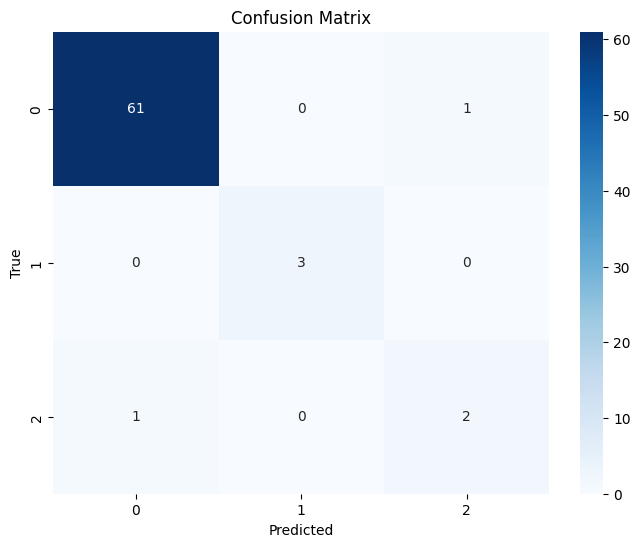

In [32]:
y_pred = clf.predict(X_test_vec)

print("\n📊 Classification Report")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [33]:
import joblib
import os

output_dir = "notebooks/final_model"
os.makedirs(output_dir, exist_ok=True)

joblib.dump(clf, os.path.join(output_dir, "classification_model.pkl"))
joblib.dump(vectorizer, os.path.join(output_dir, "vectorizer.pkl"))

print("✅ Model and vectorizer saved to 'notebooks/final_model/'")



✅ Model and vectorizer saved to 'notebooks/final_model/'
